# Trabalho 2

## Aluno : Gabriel Borin Macedo
## RA : 197201

# Descrição : Esse _script_ é o relatório do _trabalho 2_.

## Parte 0 : Criação da função de plot para o programa
Para esta célula, será criada uma função que faz o plot de images. Essa função foi criada para evitar a repetição de código desnecessário

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


def info_segment(img_mask: np.ndarray) -> tuple[int, int, float]:
    """

    :param img:
    :return:
    """
    # Contando a quantidade de pixels
    n_segmented_pixels = np.count_nonzero(img_mask == 0)
    img_total_pixels = img_mask.shape[0] * img_mask.shape[1]
    percent_segmented_pixels = n_segmented_pixels / img_total_pixels
    return n_segmented_pixels, img_total_pixels, percent_segmented_pixels


def save_img(img: np.ndarray, title_msg: str = "", file_path: str = "", file_dir: str = "") -> None:
    """
    Função que faz o plot de uma imagem

    :param img: np.ndarray que representa a imagem que será plotada
    :param show_title: booleana que indica se será criado um título para o plot da imagem
    :param title_msg: string que representa o título da imagem
    :param file_path:
    :param file_dir:
    :return: None
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap="gray", vmin=img.min(), vmax=img.max())
    if (title_msg):
        plt.title(title_msg)
    plt.axis("off")
    os.makedirs(file_dir, exist_ok=True)
    plt.savefig(file_dir + file_path)


def plot_img_hist(img: np.ndarray, title: str = "", save_fig_name: str = "", save_dir: str = "") -> None:
    """

    :param img:
    :param title:
    :param save_fig_name:
    :param save_dir:
    :return:
    """
    plt.figure(figsize=(10, 10))
    plt.title(title)
    histr = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(histr)

    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()


def plot_figures_in_line(img1: np.ndarray, title1: str, img2: np.ndarray, title2: str, **kwargs: dict):
    """

    :param img1:
    :param title1:
    :param img2:
    :param title2:
    :param kwargs:
    :return:
    """

    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    plt.figure(figsize=(15, 15))

    # imagem original
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.axis("off")
    plt.imshow(img1, cmap="gray", vmin=img1.min(), vmax=img1.max())

    # imagem com o treshold aplicado
    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.axis("off")
    plt.imshow(img2, cmap="gray", vmin=img2.min(), vmax=img2.max())

    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()

Além disso, vamos carregar as imagens de exemplo nesta célula

In [2]:
img_baboon = cv2.imread("Imagens/baboon.pgm", -1)
img_fiducial = cv2.imread("Imagens/fiducial.pgm", -1)
img_retina = cv2.imread("Imagens/retina.pgm", -1)
img_sonnet = cv2.imread("Imagens/sonnet.pgm", -1)
img_wedge = cv2.imread("Imagens/wedge.pgm", -1)

## Parte 1 : Aplicação do método Global
Inicialmente, será definido a função do método global sendo

In [3]:
from skimage.filters import threshold_otsu


def global_method(img: np.ndarray) -> np.ndarray:
    """

    :param img:
    :return:
    """
    binary_mask = img < threshold_otsu(img)
    return binary_mask

/home/borinmacedo/anaconda3/envs/Introducao-ao-Processamento-de-Imagem-Digital/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Aplicação do **método global** nas imagens de exemplo
Agora, vamos aplicar o método nas imagens de exemplo, calcular o histograma da imagem original e encontrar a proporção de _pixels_ preto em relação a imagem original

#### Imagem _baboon_

##### Calculando o histograma

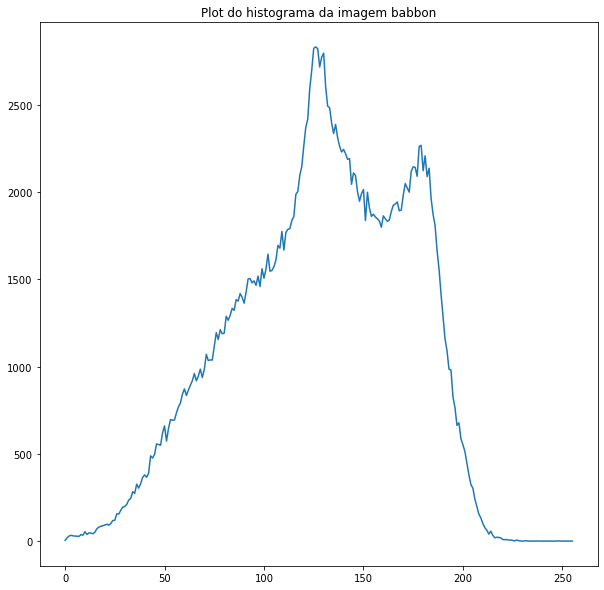

In [4]:
plot_img_hist(img_baboon, title="Plot do histograma da imagem babbon",
              save_dir="ResultadosImagens/MetodoGlobal/Histogramas/", save_fig_name="histo_babbon.png")

 **Talves descrever algo do tipo de normalizar o contraste da imagem**

#### Calculando a máscara da imagem e a quantidade de pixels pretos

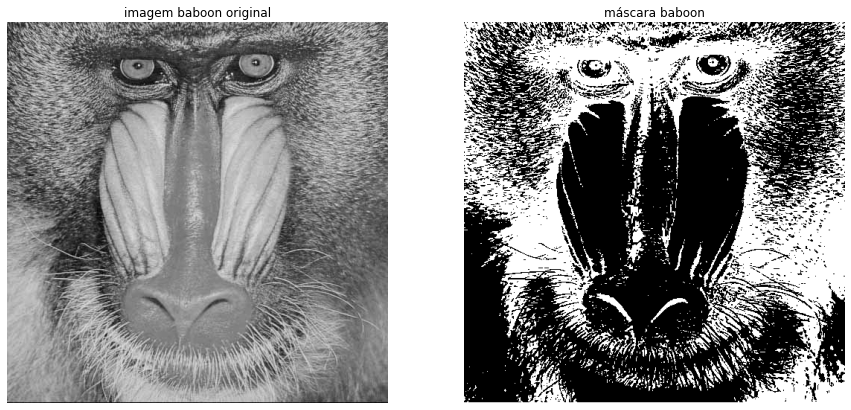

In [5]:
mask_baboon = global_method(img_baboon)
plot_figures_in_line(img_baboon, "imagem baboon original", mask_baboon, "máscara baboon",
                     save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [6]:
print("valor mínimo da máscara : {}".format(mask_baboon.min()))
print("valor máximo da máscara : {}".format(mask_baboon.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_baboon)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : False
valor máximo da máscara : True
relação pixels pretos pelo total de pixels na imagem : 157347/262144 ~= 0.60 %


#### Imagem __fiducial__

##### Calculando o histograma

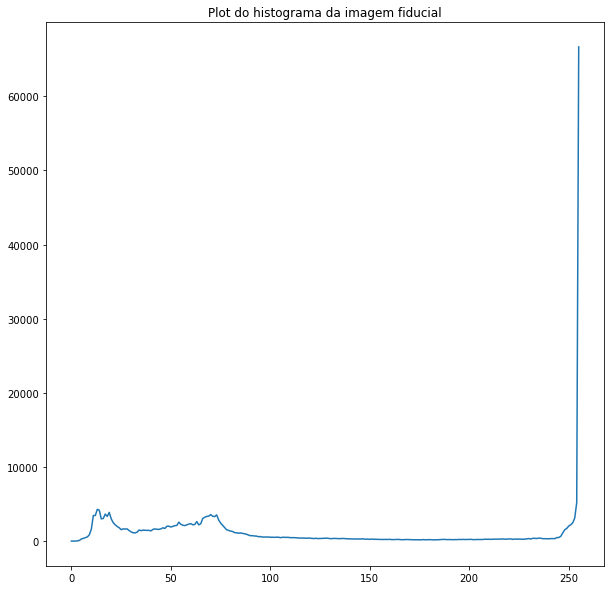

In [7]:
plot_img_hist(img_fiducial, title="Plot do histograma da imagem fiducial",
              save_dir="ResultadosImagens/MetodoGlobal/Histogramas/", save_fig_name="histo_fiducial.png")

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

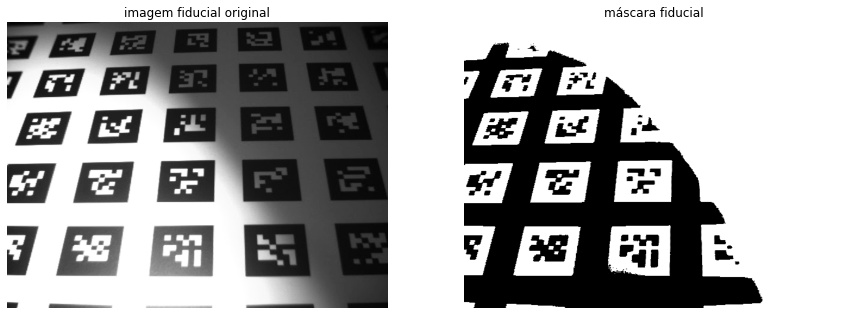

In [8]:
mask_fiducial = global_method(img_fiducial)
plot_figures_in_line(img_fiducial, "imagem fiducial original", mask_fiducial, "máscara fiducial",
                     save_fig="fiducial_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [9]:
print("valor mínimo da máscara : {}".format(mask_fiducial.min()))
print("valor máximo da máscara : {}".format(mask_fiducial.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_fiducial)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : False
valor máximo da máscara : True
relação pixels pretos pelo total de pixels na imagem : 110444/307200 ~= 0.36 %


#### Imagem __retina__

##### Calculando o histograma

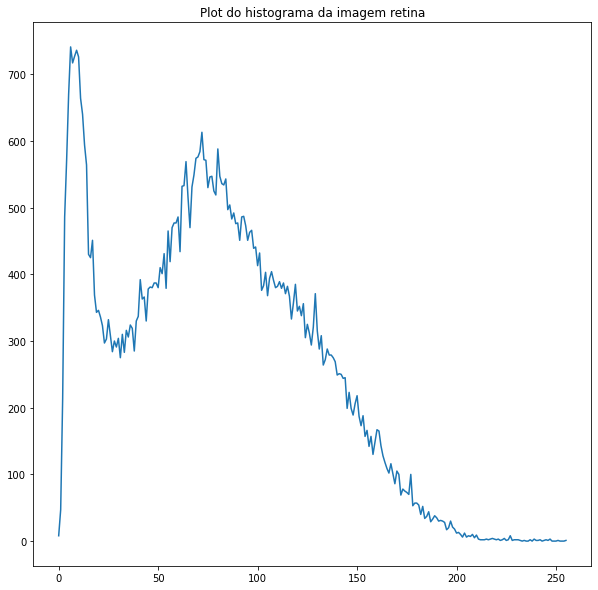

In [10]:
plot_img_hist(img_retina, title="Plot do histograma da imagem retina",
              save_dir="ResultadosImagens/MetodoGlobal/Histogramas/", save_fig_name="histo_retina.png")

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

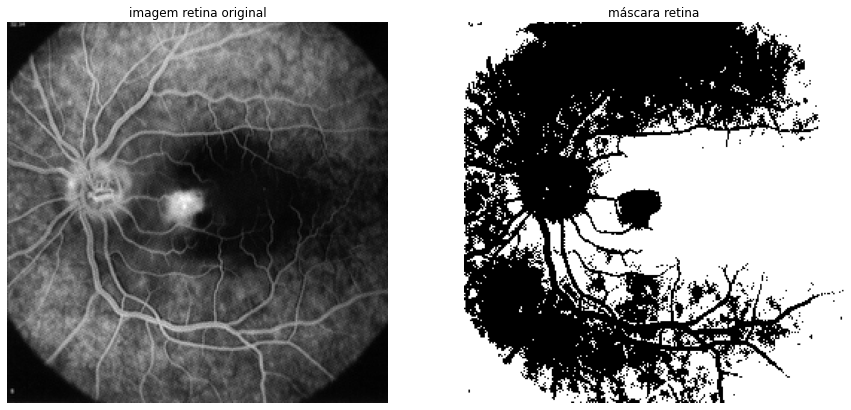

In [11]:
mask_retina = global_method(img_retina)
plot_figures_in_line(img_retina, "imagem retina original", mask_retina, "máscara retina",
                     save_fig="retina_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [12]:
print("valor mínimo da máscara : {}".format(mask_retina.min()))
print("valor máximo da máscara : {}".format(mask_retina.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_retina)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : False
valor máximo da máscara : True
relação pixels pretos pelo total de pixels na imagem : 30972/65536 ~= 0.47 %


#### Imagem __sonnet__

##### Calculando o histograma

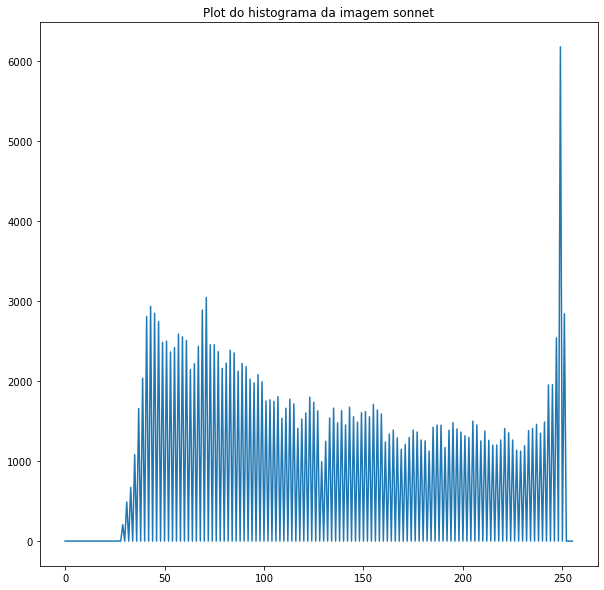

In [13]:
plot_img_hist(img_sonnet, title="Plot do histograma da imagem sonnet",
              save_dir="ResultadosImagens/MetodoGlobal/Histogramas/", save_fig_name="histo_sonnet.png")

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

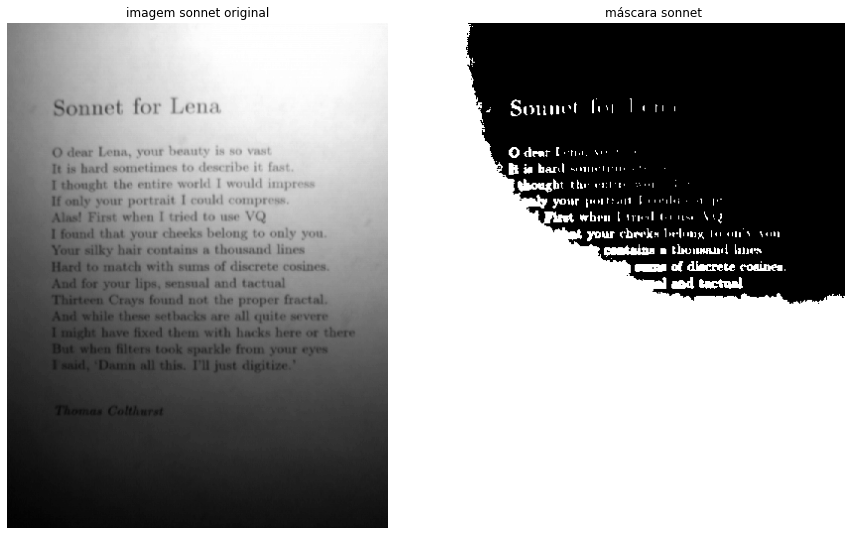

In [14]:
mask_sonnet = global_method(img_sonnet)
plot_figures_in_line(img_sonnet, "imagem sonnet original", mask_sonnet, "máscara sonnet",
                     save_fig="sonnet_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [15]:
print("valor mínimo da máscara : {}".format(mask_sonnet.min()))
print("valor máximo da máscara : {}".format(mask_sonnet.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_sonnet)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : False
valor máximo da máscara : True
relação pixels pretos pelo total de pixels na imagem : 85347/195840 ~= 0.44 %


#### Imagem __wedge__

##### Calculando o histograma

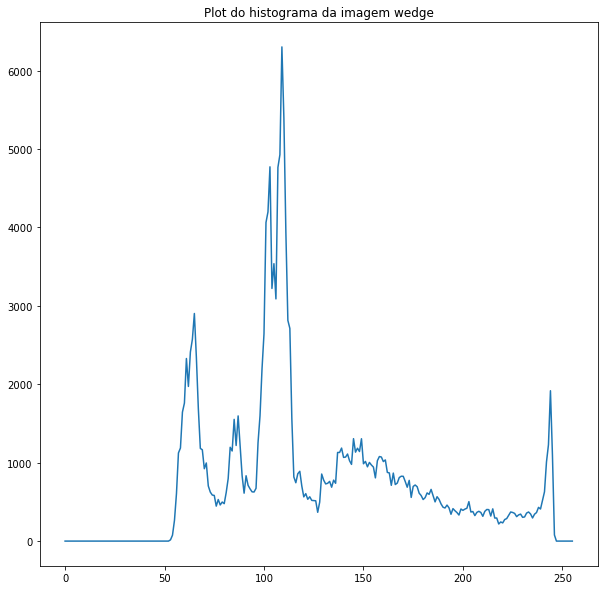

In [16]:
plot_img_hist(img_wedge, title="Plot do histograma da imagem wedge",
              save_dir="ResultadosImagens/MetodoGlobal/Histogramas/", save_fig_name="histo_wedge.png")

##### Calculando

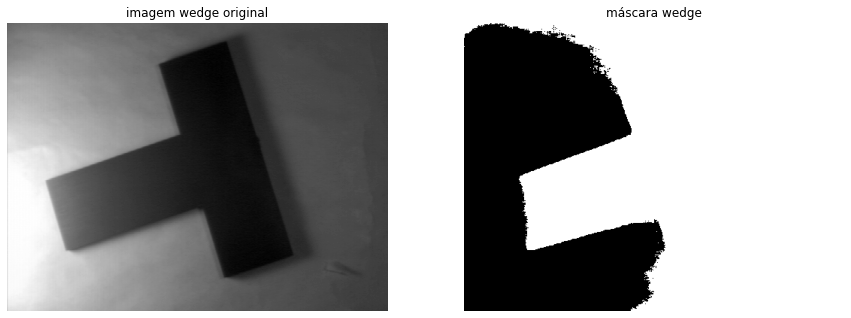

In [17]:
mask_wedge = global_method(img_wedge)
plot_figures_in_line(img_wedge, "imagem wedge original", mask_wedge, "máscara wedge",
                     save_fig="wedge_comparacao.png", save_dir="ResultadosImagens/MetodoGlobal/")

In [18]:
print("valor mínimo da máscara : {}".format(mask_wedge.min()))
print("valor máximo da máscara : {}".format(mask_wedge.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_wedge)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : False
valor máximo da máscara : True
relação pixels pretos pelo total de pixels na imagem : 66517/194688 ~= 0.34 %


## Parte 2 : Método de Bernsen
Será utilizado o pacote **mahotas** para isso.
Inicialmente, iremos utilizar esse comando para instalar a biblioteca do **mahotas**

In [19]:
%pip install --upgrade numpy
from mahotas.thresholding import bernsen

Note: you may need to restart the kernel to use updated packages.


### Aplicação do **método de bérsen** nas imagens de exemplo
https://www.geeksforgeeks.org/mahotas-bernsen-local-thresholding/

#### Imagem __baboon__

##### Calculando a máscara da imagem e a quantidade de pixels preto na imagem

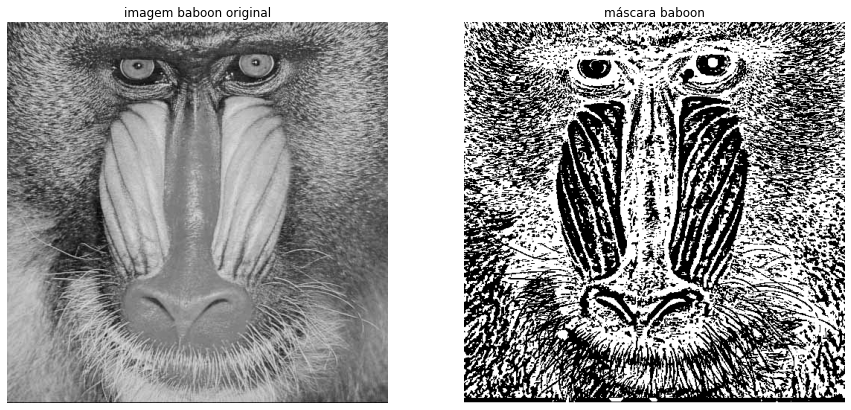

In [20]:
mask_baboon = bernsen(img_baboon, 7, 200).astype(img_baboon.dtype)
plot_figures_in_line(img_baboon, "imagem baboon original", mask_baboon, "máscara baboon",
                     save_fig="babbon_comparacao.png", save_dir="ResultadosImagens/MetodoBersen/")

In [21]:
print("valor mínimo da máscara : {}".format(mask_baboon.min()))
print("valor máximo da máscara : {}".format(mask_baboon.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_baboon)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 129936/262144 ~= 0.50 %


##### Imagem __fiducial__

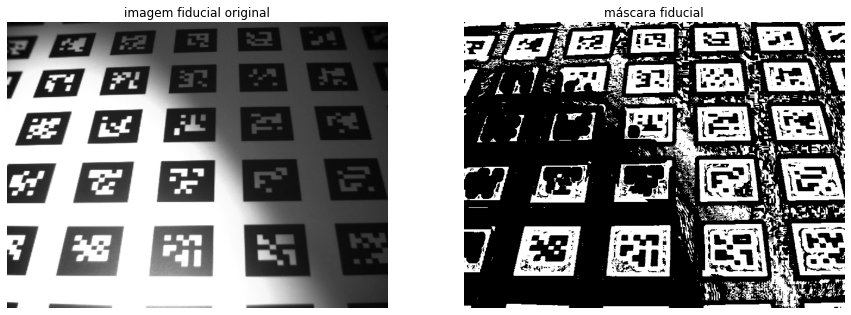

In [22]:
mask_fiducial = (bernsen(img_fiducial, 7, 200)).astype(img_fiducial.dtype)
plot_figures_in_line(img_fiducial, "imagem fiducial original", mask_fiducial, "máscara fiducial",
                     save_fig="", save_dir="")

In [23]:
print("valor mínimo da máscara : {}".format(mask_fiducial.min()))
print("valor máximo da máscara : {}".format(mask_fiducial.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_fiducial)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 201148/307200 ~= 0.65 %


#### Imagem __retina__

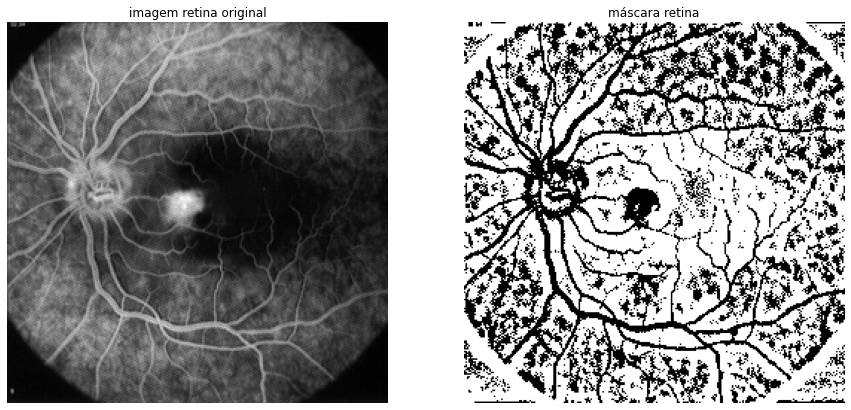

In [24]:
mask_retina = (bernsen(img_retina, 7, 200)).astype(img_retina.dtype)
plot_figures_in_line(img_retina, "imagem retina original", mask_retina, "máscara retina",
                     save_fig="", save_dir="")

In [25]:
print("valor mínimo da máscara : {}".format(mask_retina.min()))
print("valor máximo da máscara : {}".format(mask_retina.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_retina)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 21996/65536 ~= 0.34 %


##### Imagem __sonnet__

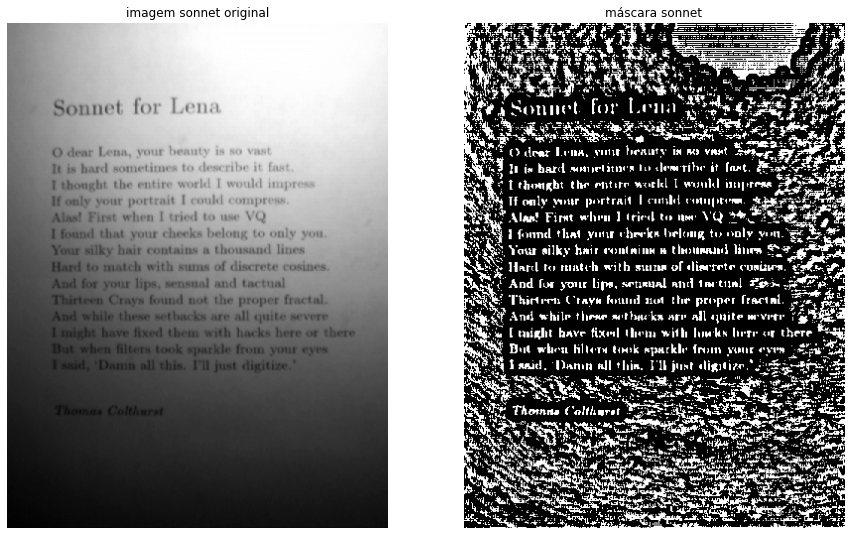

In [26]:
mask_sonnet = (bernsen(img_sonnet, 7, 200)).astype(mask_sonnet.dtype)
plot_figures_in_line(img_sonnet, "imagem sonnet original", mask_sonnet, "máscara sonnet",
                     save_fig="", save_dir="")

In [27]:
print("valor mínimo da máscara : {}".format(mask_sonnet.min()))
print("valor máximo da máscara : {}".format(mask_sonnet.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_sonnet)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : False
valor máximo da máscara : True
relação pixels pretos pelo total de pixels na imagem : 141989/195840 ~= 0.73 %


##### Imagem __wedge__

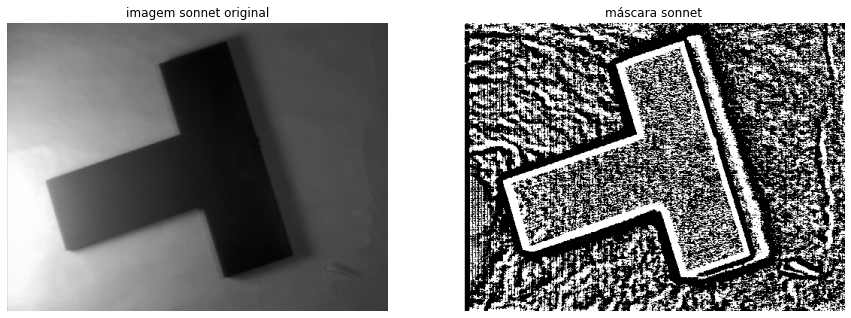

In [28]:
mask_wedge = (bernsen(img_wedge, 7, 200)).astype(img_wedge.dtype)
plot_figures_in_line(img_wedge, "imagem sonnet original", mask_wedge, "máscara sonnet",
                     save_fig="", save_dir="")

In [29]:
print("valor mínimo da máscara : {}".format(mask_wedge.min()))
print("valor máximo da máscara : {}".format(mask_wedge.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_wedge)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 116831/194688 ~= 0.60 %


# Parte 3 : Método de Niblack
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

In [30]:
%pip install scikit-image

  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
Note: you may need to restart the kernel to use updated packages.


Agora, vamos criar a função para fazer isso

In [31]:
from skimage.filters import threshold_niblack


def niblack_treshold(img: np.ndarray, window_size: int, k: float) -> np.ndarray:
    binary_mask = (img < threshold_niblack(img, window_size, k)).astype(img.dtype)
    return binary_mask

## Imagem __baboon__

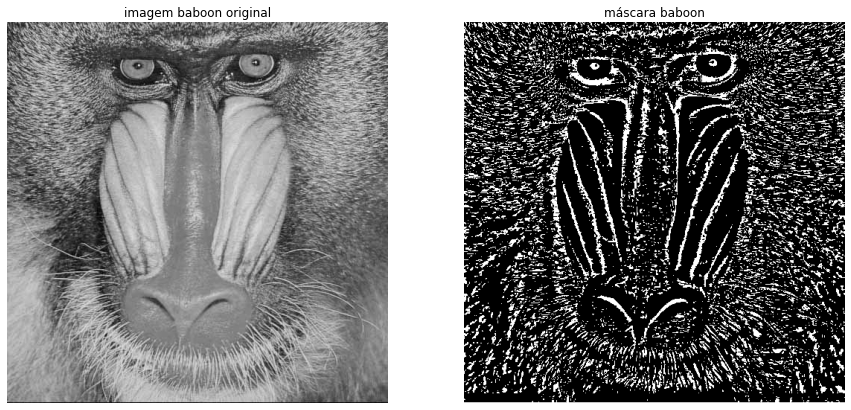

In [32]:
mask_baboon = niblack_treshold(img_baboon, 25, 0.8)

plot_figures_in_line(img_baboon, "imagem baboon original", mask_baboon, "máscara baboon",
                     save_fig="", save_dir="")

In [33]:
print("valor mínimo da máscara : {}".format(mask_baboon.min()))
print("valor máximo da máscara : {}".format(mask_baboon.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_baboon)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 211708/262144 ~= 0.81 %


## Imagem __fiducial__

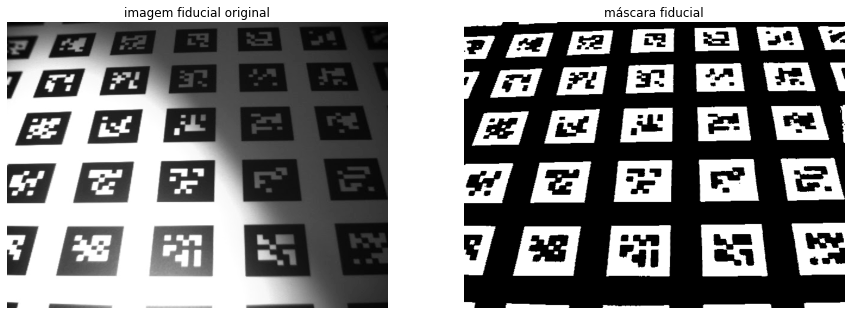

In [34]:
mask_fiducial = niblack_treshold(img_fiducial, 55, 0.4)

plot_figures_in_line(img_fiducial, "imagem fiducial original", mask_fiducial, "máscara fiducial",
                     save_fig="", save_dir="")

In [35]:
print("valor mínimo da máscara : {}".format(mask_fiducial.min()))
print("valor máximo da máscara : {}".format(mask_fiducial.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_fiducial)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 204822/307200 ~= 0.67 %


## Imagem __retina__

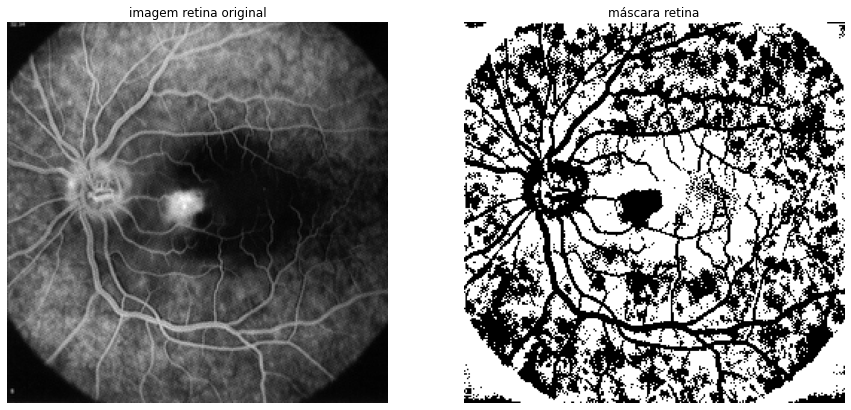

In [36]:
mask_retina = niblack_treshold(img_retina, 33, 0.04)

plot_figures_in_line(img_retina, "imagem retina original", mask_retina, "máscara retina",
                     save_fig="", save_dir="")

In [37]:
print("valor mínimo da máscara : {}".format(mask_retina.min()))
print("valor máximo da máscara : {}".format(mask_retina.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_retina)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 28993/65536 ~= 0.44 %


## Imagem __sonnet__

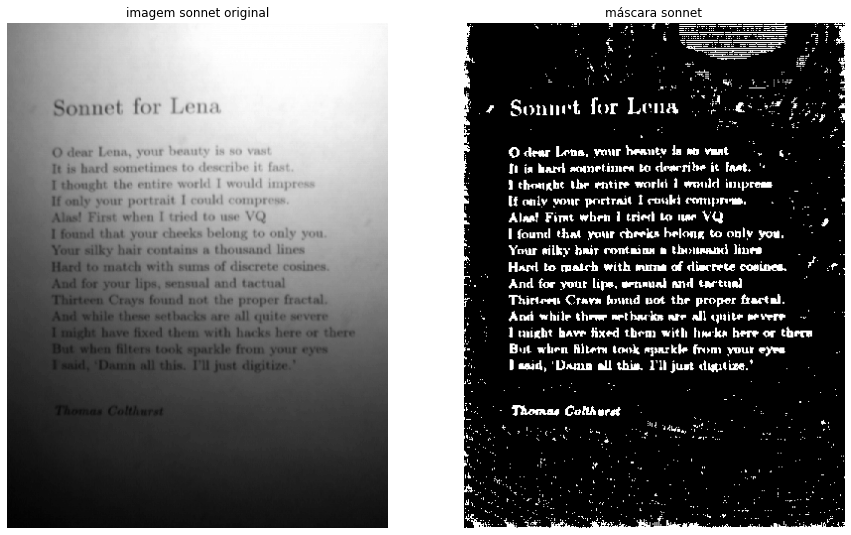

In [38]:
mask_sonnet = niblack_treshold(img_sonnet, 25, 0.8)

plot_figures_in_line(img_sonnet, "imagem sonnet original", mask_sonnet, "máscara sonnet",
                     save_fig="", save_dir="")

In [39]:
print("valor mínimo da máscara : {}".format(mask_sonnet.min()))
print("valor máximo da máscara : {}".format(mask_sonnet.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_sonnet)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 174935/195840 ~= 0.89 %


## Imagem __wedge__

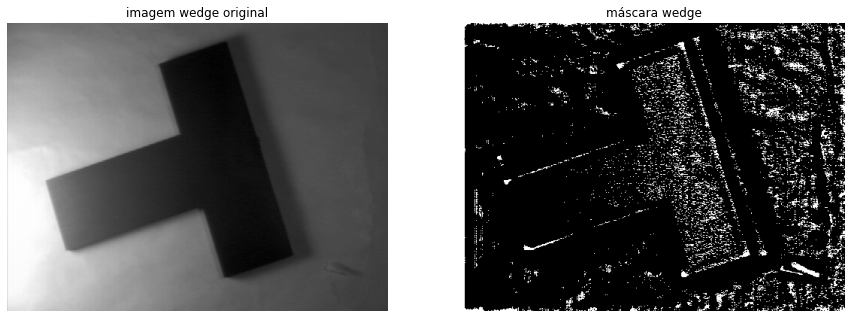

In [40]:
mask_wedge = niblack_treshold(img_wedge, 25, 0.8)

plot_figures_in_line(img_wedge, "imagem wedge original", mask_wedge, "máscara wedge",
                     save_fig="", save_dir="")

In [41]:
print("valor mínimo da máscara : {}".format(mask_wedge.min()))
print("valor máximo da máscara : {}".format(mask_wedge.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_wedge)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 179251/194688 ~= 0.92 %


# Parte 4 : Método de Sauvola e Pietaksinen
https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_niblack_sauvola.html

Agora, vamos escrever uma função para facilitar o uso da __sauvola__

In [42]:
from skimage.filters import threshold_sauvola


def sauvola_treshold(img: np.ndarray, window_size: int) -> np.ndarray:
    """

    :param img:
    :param window_size:
    :return:
    """
    binary_mask = (img < threshold_sauvola(img, window_size=window_size)).astype(img.dtype)
    return binary_mask


## Imagem __baboon__

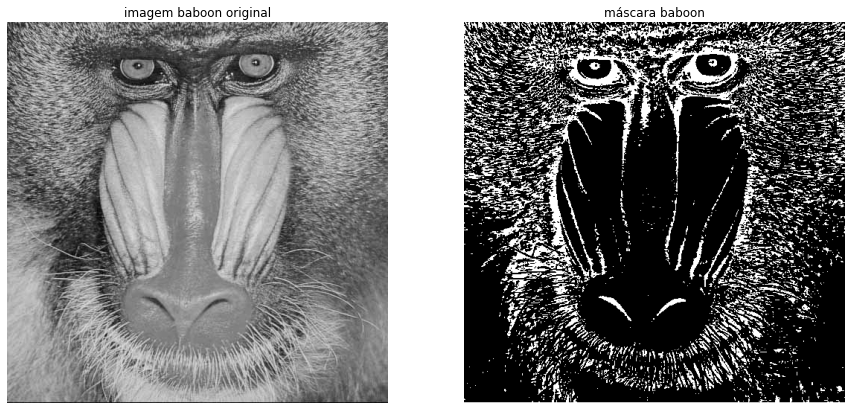

In [43]:
mask_baboon = sauvola_treshold(img_baboon, 25)

plot_figures_in_line(img_baboon, "imagem baboon original", mask_baboon, "máscara baboon",
                     save_fig="", save_dir="")

In [44]:
print("valor mínimo da máscara : {}".format(mask_baboon.min()))
print("valor máximo da máscara : {}".format(mask_baboon.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_baboon)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 206063/262144 ~= 0.79 %


## Imagem __fiducial__

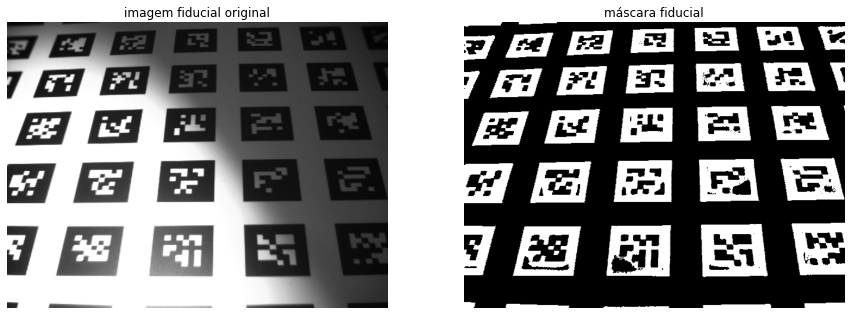

In [45]:
mask_fiducial = sauvola_treshold(img_fiducial, 25)

plot_figures_in_line(img_fiducial, "imagem fiducial original", mask_fiducial, "máscara fiducial",
                     save_fig="", save_dir="")

In [46]:
print("valor mínimo da máscara : {}".format(mask_fiducial.min()))
print("valor máximo da máscara : {}".format(mask_fiducial.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_fiducial)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 207964/307200 ~= 0.68 %


## Imagem __retina__

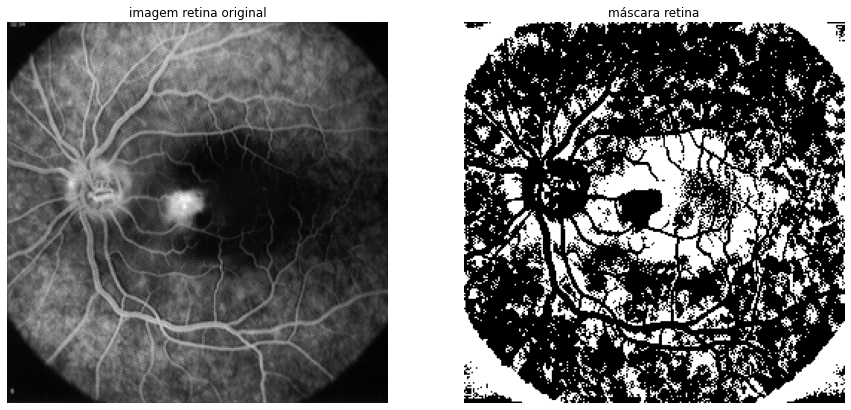

In [47]:
mask_retina = sauvola_treshold(img_retina, 33)

plot_figures_in_line(img_retina, "imagem retina original", mask_retina, "máscara retina",
                     save_fig="", save_dir="")

In [48]:
print("valor mínimo da máscara : {}".format(mask_retina.min()))
print("valor máximo da máscara : {}".format(mask_retina.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_retina)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 43238/65536 ~= 0.66 %


## Imagem __sonnet__

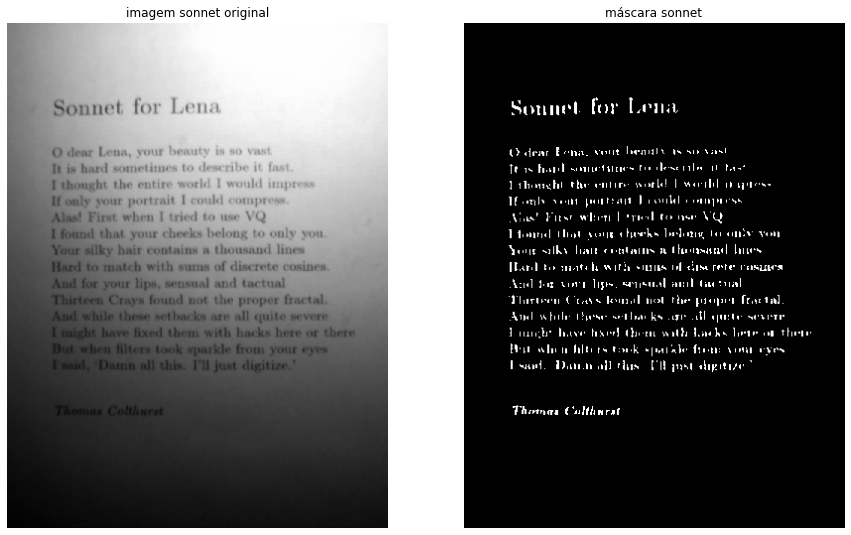

In [49]:
mask_sonnet = sauvola_treshold(img_sonnet, 33)

plot_figures_in_line(img_sonnet, "imagem sonnet original", mask_sonnet, "máscara sonnet",
                     save_fig="", save_dir="")

In [50]:
print("valor mínimo da máscara : {}".format(mask_sonnet.min()))
print("valor máximo da máscara : {}".format(mask_sonnet.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_sonnet)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 189152/195840 ~= 0.97 %


## Imagem __wedge__

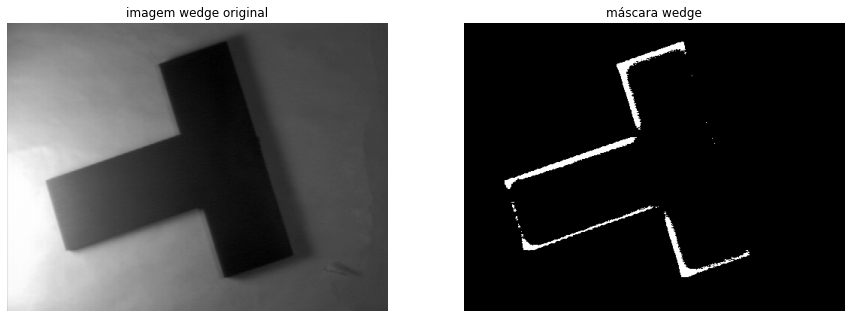

In [51]:
mask_wedge = sauvola_treshold(img_wedge, 33)

plot_figures_in_line(img_wedge, "imagem wedge original", mask_wedge, "máscara wedge",
                     save_fig="", save_dir="")

In [52]:
print("valor mínimo da máscara : {}".format(mask_wedge.min()))
print("valor máximo da máscara : {}".format(mask_wedge.max()))

n_segmented_pixels, img_total_pixels, percent_segmented_pixels = info_segment(mask_wedge)
print("relação pixels pretos pelo total de pixels na imagem : {}/{} ~= {:.2f} %".format(n_segmented_pixels,
                                                                                        img_total_pixels,
                                                                                        percent_segmented_pixels))

valor mínimo da máscara : 0
valor máximo da máscara : 1
relação pixels pretos pelo total de pixels na imagem : 190127/194688 ~= 0.98 %


# Parte 5 : Método de Phansalskar, More e Sabale
TODO : Para os outros métodos, o skimage já tem os filtros de média e contraste
https://craftofcoding.wordpress.com/2021/09/28/thresholding-algorithms-phansalkar-local/
https://scikit-image.org/docs/dev/auto_examples/applications/plot_thresholding.html#sphx-glr-auto-examples-applications-plot-thresholding-py

Bimodal histogram

## Parte 6 : Método do contraste
https://towardsdatascience.com/clahe-and-thresholding-in-python-3bf690303e40

# Parte 7 : Método da média
https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_local

In [53]:
from skimage.filters import threshold_local

thresh = threshold_local(img, block_size=15, method="mean", mode="reflect")
binary = (img > thresh).astype(np.uint8)

plot_img(binary)
print(binary.max())

NameError: name 'img' is not defined

# Parte 8 : Método da mediana

In [ ]:
thresh = threshold_local(img, block_size=13, method="median", mode="reflect")
binary = (img > thresh).astype(np.uint8)

plot_img(binary)
print(binary.max())